# **1. Perkenalan Dataset**

Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari kaggle: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset/data

# **2. Import Library**

Pada tahap ini, impor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 14.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **3. Memuat Dataset**

Pada tahap ini, memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

In [3]:
from google.colab import files
files.upload()

Saving Crop_recommendation.csv to Crop_recommendation.csv


{'Crop_recommendation.csv': b'N,P,K,temperature,humidity,ph,rainfall,label\r\n90,42,43,20.87974371,82.00274423,6.502985292000001,202.9355362,rice\r\n85,58,41,21.77046169,80.31964408,7.038096361,226.6555374,rice\r\n60,55,44,23.00445915,82.3207629,7.840207144,263.9642476,rice\r\n74,35,40,26.49109635,80.15836264,6.980400905,242.8640342,rice\r\n78,42,42,20.13017482,81.60487287,7.628472891,262.7173405,rice\r\n69,37,42,23.05804872,83.37011772,7.073453503,251.0549998,rice\r\n69,55,38,22.70883798,82.63941394,5.70080568,271.3248604,rice\r\n94,53,40,20.27774362,82.89408619,5.718627177999999,241.9741949,rice\r\n89,54,38,24.51588066,83.53521629999999,6.685346424,230.4462359,rice\r\n68,58,38,23.22397386,83.03322691,6.336253525,221.2091958,rice\r\n91,53,40,26.52723513,81.41753846,5.386167788,264.6148697,rice\r\n90,46,42,23.97898217,81.45061596,7.50283396,250.0832336,rice\r\n78,58,44,26.80079604,80.88684822,5.108681786,284.4364567,rice\r\n93,56,36,24.01497622,82.05687182,6.98435366,185.2773389,rice\r

In [4]:
crop_recom = pd.read_csv('Crop_recommendation.csv')

crop_recom

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, lakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
crop_recom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
# Memeriksa tipe data setiap kolom
data_types = crop_recom.dtypes

# Menentukan apakah kolom adalah numerikal atau kategorikal
column_types = {}
for column, dtype in data_types.items():
    if dtype == 'object':  # Kategorikal
        column_types[column] = 'Kategorikal'
    else:  # Numerikal
        column_types[column] = 'Numerikal'

# Menampilkan hasil dalam bentuk DataFrame
df_column_types = pd.DataFrame(list(column_types.items()), columns=['Kolom', 'Tipe Data'])
print(df_column_types)

         Kolom    Tipe Data
0            N    Numerikal
1            P    Numerikal
2            K    Numerikal
3  temperature    Numerikal
4     humidity    Numerikal
5           ph    Numerikal
6     rainfall    Numerikal
7        label  Kategorikal


In [7]:
crop_recom.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


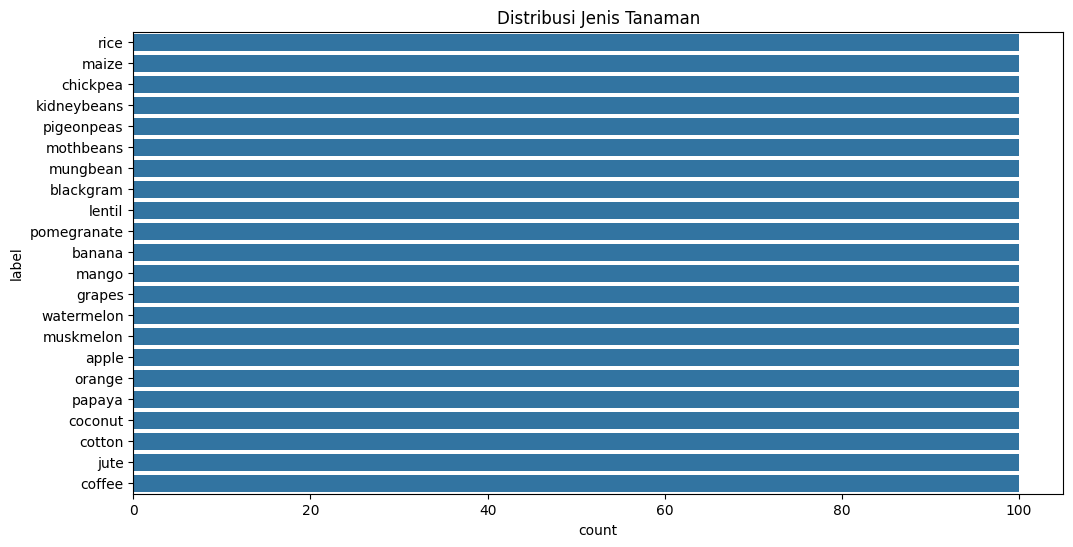

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(data=crop_recom, y='label', order=crop_recom['label'].value_counts().index)
plt.title("Distribusi Jenis Tanaman")
plt.show()

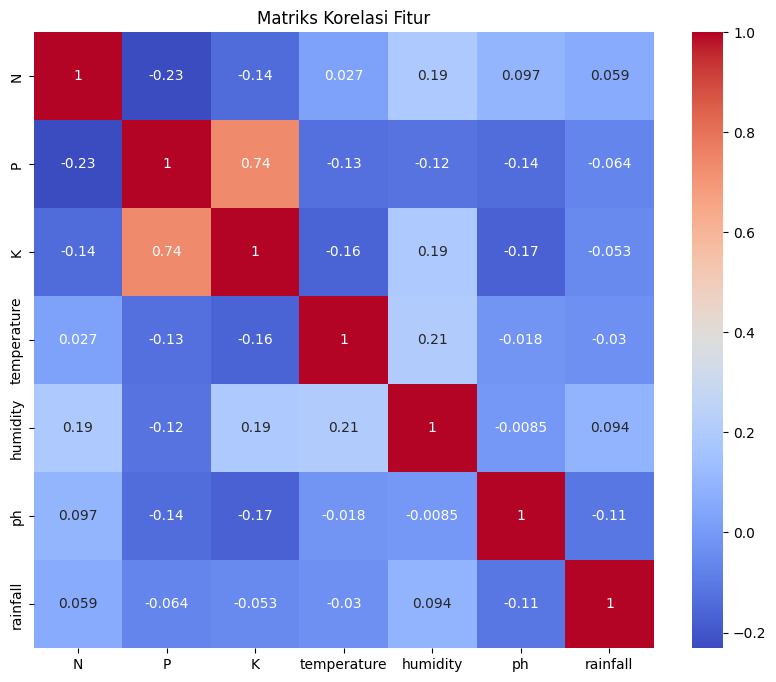

In [9]:
# Korelasi antar fitur
plt.figure(figsize=(10, 8))
# Drop the non-numeric 'label' column before calculating correlation
corr = crop_recom.drop('label', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi Fitur")
plt.show()

In [10]:
# Pengecekan Outliers menggunakan IQR
def detect_outliers(crop_recom, column):
    Q1 = crop_recom[column].quantile(0.25)
    Q3 = crop_recom[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = crop_recom[(crop_recom[column] < lower_bound) | (crop_recom[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

print("\nPengecekan Outliers:")
for column in crop_recom.select_dtypes(include=[np.number]).columns:
    count, lower, upper = detect_outliers(crop_recom, column)
    print(f"Kolom {column}: {count} outliers (Batas bawah: {lower:.2f}, Batas atas: {upper:.2f})")


Pengecekan Outliers:
Kolom N: 0 outliers (Batas bawah: -73.88, Batas atas: 179.12)
Kolom P: 138 outliers (Batas bawah: -32.00, Batas atas: 128.00)
Kolom K: 200 outliers (Batas bawah: -23.50, Batas atas: 92.50)
Kolom temperature: 86 outliers (Batas bawah: 14.08, Batas atas: 37.25)
Kolom humidity: 30 outliers (Batas bawah: 15.73, Batas atas: 134.48)
Kolom ph: 57 outliers (Batas bawah: 4.54, Batas atas: 8.35)
Kolom rainfall: 100 outliers (Batas bawah: -25.02, Batas atas: 213.84)


In [11]:
# Pengecekan Skewness
print("\nSkewness Fitur Numerik:")
skewness = crop_recom.select_dtypes(include=[np.number]).skew()
print(skewness)


Skewness Fitur Numerik:
N              0.509721
P              1.010773
K              2.375167
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
dtype: float64


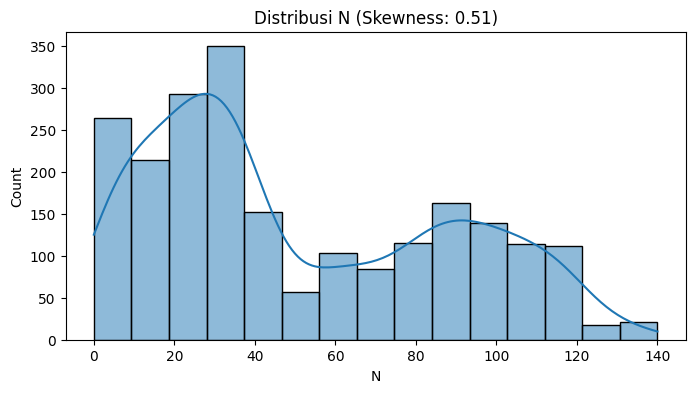

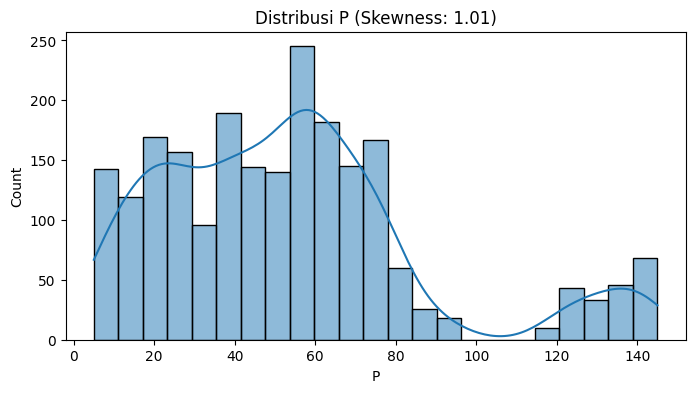

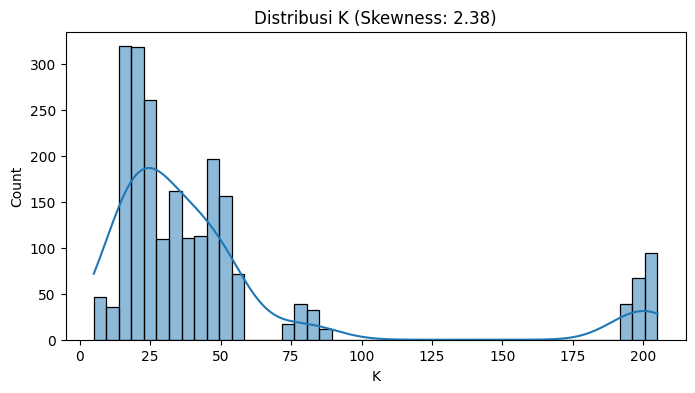

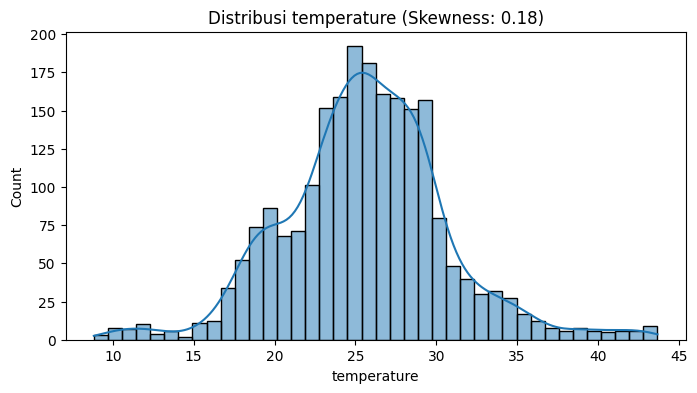

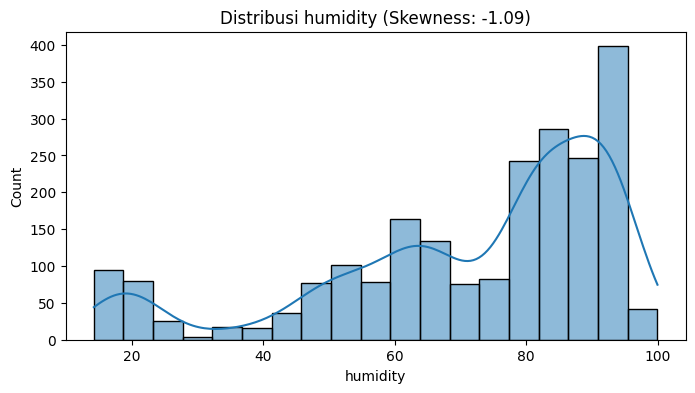

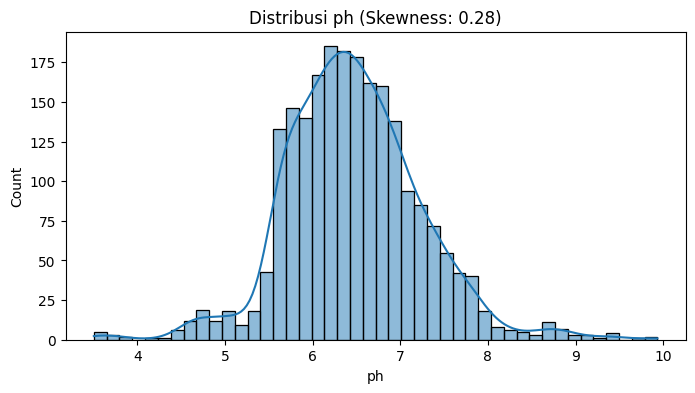

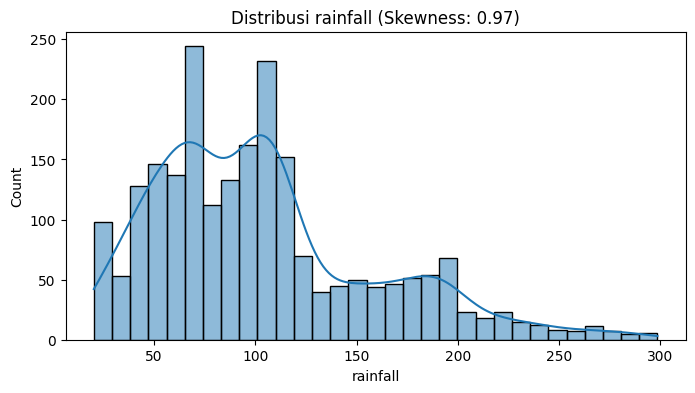

In [12]:
for column in crop_recom.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(crop_recom[column], kde=True)
    plt.title(f"Distribusi {column} (Skewness: {crop_recom[column].skew():.2f})")
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

In [13]:
# Menghitung jumlah data kosong pada setiap kolom
crop_recom.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [14]:
crop_recom.duplicated().sum()

np.int64(0)

In [15]:
# Memisahkan fitur dan target
X = crop_recom.drop('label', axis=1)
y = crop_recom['label']

# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cek nilai mean dan standar deviasi:
print("Mean per fitur:", scaler.mean_)
print("Standard deviation per fitur:", scaler.scale_)

Mean per fitur: [ 50.55181818  53.36272727  48.14909091  25.61624385  71.48177922
   6.46948007 103.46365542]
Standard deviation per fitur: [36.90894258 32.97838509 50.63641835  5.06259762 22.25875106  0.77376177
 54.94589656]


In [16]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# **6. Eksport Data**

Simpan data hasil preprocessing ke file.csv

In [17]:
# Konversi hasil menjadi DataFrame
df_preprocessed = pd.DataFrame(X_scaled, columns=X.columns)
df_preprocessed['label'] = y  # tambahkan kembali kolom label agar bisa digunakan kembali nanti

# 4. Simpan hasil preprocessing ke file CSV
df_preprocessed.to_csv("crop_preprocessing.csv", index=False)
print("\n✅ Data hasil preprocessing berhasil disimpan ke 'crop_preprocessing.csv'")


✅ Data hasil preprocessing berhasil disimpan ke 'crop_preprocessing.csv'
